# Neural Networks

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential

$$
   f:\mathbb R \to \mathbb R, \ y = 2x^2 - \frac{1}{3}x^3
$$

In [3]:
def f(x):
    return 2 * x ** 2- x ** 3 / 3

x = np.linspace(-2, 4, 25)
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

In [5]:
y = f(x)
y

array([10.66666667,  7.91145833,  5.625     ,  3.77604167,  2.33333333,
        1.265625  ,  0.54166667,  0.13020833,  0.        ,  0.11979167,
        0.45833333,  0.984375  ,  1.66666667,  2.47395833,  3.375     ,
        4.33854167,  5.33333333,  6.328125  ,  7.29166667,  8.19270833,
        9.        ,  9.68229167, 10.20833333, 10.546875  , 10.66666667])

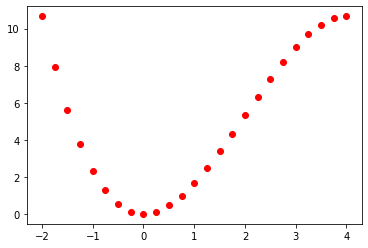

In [6]:

plt.plot(x, y, 'ro')

```{math}
    f:\mathbb R \to \mathbb R, \ y = \alpha + \beta * x
```

In [7]:
beta = np.cov(x, y, ddof=0)[0,1] / np.var(x)
beta

1.0541666666666667

In [8]:
alpha = y.mean() - beta * x.mean()
alpha

3.8625000000000003

In [10]:
y_ = alpha + beta * x
MSE = ((y - y_) ** 2).mean()
MSE

10.721953125

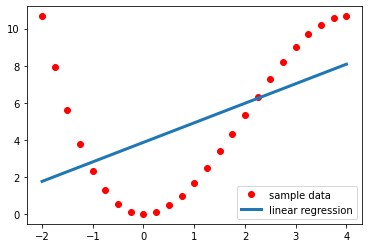

In [11]:
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='linear regression')
plt.legend()

deg=1 | MSE=10.72195
deg=2 | MSE=2.31258
deg=3 | MSE=0.00000


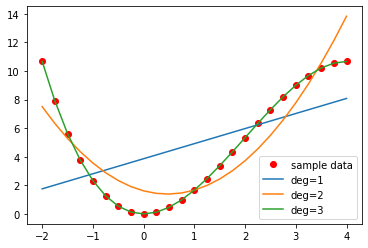

In [12]:
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 2, 3]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg} | MSE={MSE:.5f}')
    plt.plot(x, y_, label=f'deg={deg}')
plt.legend()

round=1 | MSE=3.87256
round=2 | MSE=0.92527
round=3 | MSE=0.28527
round=4 | MSE=0.13193
round=5 | MSE=0.09568


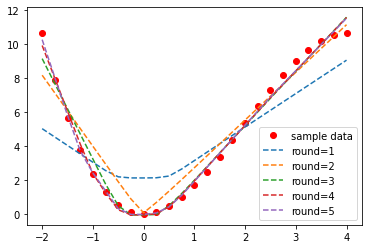

In [17]:
tf.random.set_seed(100)

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 6):
    model.fit(x, y, epochs=100, verbose=False)
    y_ = model.predict(x)
    MSE = ((y-y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend()


deg= 1 | MSE=0.28153
deg= 5 | MSE=0.27331
deg= 9 | MSE=0.25442
deg=11 | MSE=0.23458
deg=13 | MSE=0.22989
deg=15 | MSE=0.21672


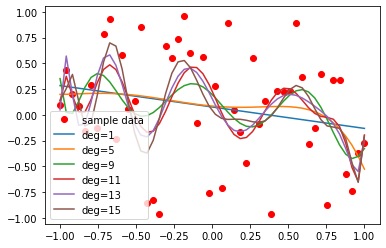

In [18]:
np.random.seed(0)
x = np.linspace(-1, 1)
y = np.random.random(len(x)) * 2 - 1

plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 5, 9, 11, 13, 15]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg:2d} | MSE={MSE:.5f}')
    plt.plot(x, y_, label=f'deg={deg}')
plt.legend()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               512       
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 198,145
Trainable params: 198,145
Non-trainable params: 0
_________________________________________________________________
round=1 | MSE=0.12663
round=2 | MSE=0.08440
round=3 | MSE=0.14496
round=4 | MSE=0.06024
round=5 | MSE=0.03803
roun

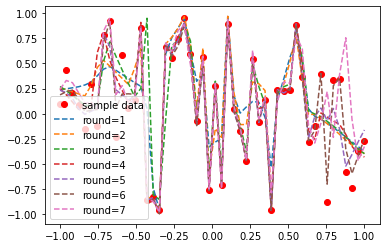

In [19]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
for _ in range(3):
    model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

model.summary()

plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 8):
    model.fit(x, y, epochs=500, verbose=False)
    y_ = model.predict(x)
    MSE = ((y-y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend()